In [1]:
import plumed
import matplotlib.pyplot as plt
import os
import MDAnalysis

In [2]:
# set working directory for all future cells
os.chdir("/Users/max/build/PLUMED/plumed-masterclass/masterclass-21-1")
# and check with bash command pwd - note the exclamation mark at the beginning
!pwd
# or in python
os.getcwd()

/Users/max/build/PLUMED/plumed-masterclass/masterclass-21-1


'/Users/max/build/PLUMED/plumed-masterclass/masterclass-21-1'

In [3]:
# Exercise 1
# Extract index of CA atoms of first 40 residues from reference PDB file
!awk '{if($3=="CA" && $6<=40)printf "%d,",$2}END{printf "\n"}' data/5-HT1B.pdb

5,22,37,54,66,73,83,100,111,123,137,151,165,177,187,194,205,220,234,258,276,288,305,315,328,347,358,369,381,393,404,421,434,445,456,466,488,500,521,540,


In [4]:
%%bash
# the same  bash command can be executed after creating a bash cell
awk '{if($3=="CA" && $6<=40)printf "%d,",$2}END{printf "\n"}' data/5-HT1B.pdb
# the entire cell is bash, so you can execute other bash commands
echo "current directory:"
pwd

5,22,37,54,66,73,83,100,111,123,137,151,165,177,187,194,205,220,234,258,276,288,305,315,328,347,358,369,381,393,404,421,434,445,456,466,488,500,521,540,
current directory:
/Users/max/build/PLUMED/plumed-masterclass/masterclass-21-1


In [5]:
# Alternatively you can parse the PDB file with python
#=============  ============  ===========  =============================================
#    COLUMNS        DATA  TYPE    FIELD        DEFINITION
#=============  ============  ===========  =============================================
#    1 -  6         Record name   "ATOM  "
#    7 - 11         Integer       serial       Atom  serial number.
#    13 - 16        Atom          name         Atom name.
#    23 - 26        Integer       resSeq       Residue sequence number.
#
list=""
for line in open("data/5-HT1B.pdb", "r").readlines():
    if(line[0:6].strip()=="ATOM"):
      # Atom  serial number   
      asn=line[6:11].strip()
      # Atom name  
      an=line[12:16].strip()
      # Residue sequence number  
      rsn=int(line[22:26].strip())
      if(an=="CA" and rsn<=40): list+=asn+","
print(list)

5,22,37,54,66,73,83,100,111,123,137,151,165,177,187,194,205,220,234,258,276,288,305,315,328,347,358,369,381,393,404,421,434,445,456,466,488,500,521,540,


In [6]:
%%bash
# Exercise 1
# create directory for this exercise
mkdir Exercise-1; cd Exercise-1
# create PLUMED input file
cat > "plumed.dat" << EOF
# Compute gyration radius on CA atoms of the first 40 N-terminal residues:
r: GYRATION ATOMS=5,22,37,54,66,73,83,100,111,123,137,151,165,177,187,194,205,220,234,258,276,288,305,315,328,347,358,369,381,393,404,421,434,445,456,466,488,500,521,540

# Compute distance between CA atoms of residues 1 and 40
d: DISTANCE ATOMS=5,540

# Print the two collective variables on COLVAR file every step
PRINT ARG=r,d FILE=COLVAR STRIDE=1
EOF

# run the driver
plumed driver --plumed plumed.dat --mf_xtc ../data/5-HT1B.xtc


DRIVER: Found molfile format trajectory xtc with name ../data/5-HT1B.xtc
PLUMED: PLUMED is starting
PLUMED: Version: 2.7.0 (git: Unknown) compiled on Dec 23 2020 at 20:47:11
PLUMED: Please cite these papers when using PLUMED [1][2]
PLUMED: For further information see the PLUMED web page at http://www.plumed.org
PLUMED: Root: /usr/local/anaconda3/envs/plumed-masterclass/lib/plumed
PLUMED: For installed feature, see /usr/local/anaconda3/envs/plumed-masterclass/lib/plumed/src/config/config.txt
PLUMED: Molecular dynamics engine: driver
PLUMED: Precision of reals: 8
PLUMED: Running over 1 node
PLUMED: Number of threads: 1
PLUMED: Cache line size: 512
PLUMED: Number of atoms: 6684
PLUMED: File suffix: 
PLUMED: FILE: plumed.dat
PLUMED: Action GYRATION
PLUMED:   with label r
PLUMED:   GYRATION RADIUS (Rg);
PLUMED:   atoms involved : 5 22 37 54 66 73 83 100 111 123 137 151 165 177 187 194 205 220 234 258 276 288 305 315 328 347 358 369 381 393 404 421 434 445 456 466 488 500 521 540 
PLUMED:  

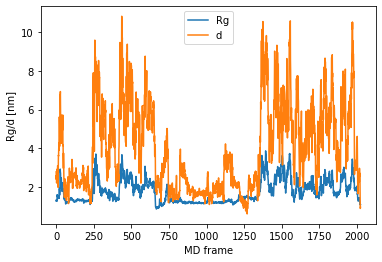

In [7]:
# import PLUMED COLVAR file into pandas dataset
data=plumed.read_as_pandas("Exercise-1/COLVAR")
# plot time serie of gyration radius (Rg) and distance (d)
plt.plot(data["time"],data["r"],label="Rg")
plt.plot(data["time"],data["d"],label="d")
# x-y axis labels
plt.xlabel("MD frame")
plt.ylabel("Rg/d [nm]")
plt.legend()

Text(0, 0.5, 'd [nm]')

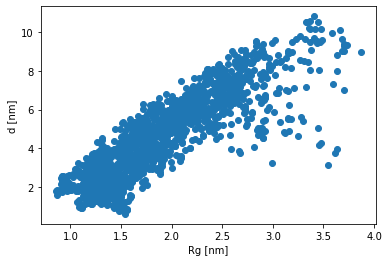

In [8]:
# plot gyration radius vs distance
plt.plot(data["r"],data["d"],'o')
# x-y axis labels
plt.xlabel("Rg [nm]")
plt.ylabel("d [nm]")

In [9]:
# Exercise 2
# Extract index of atoms for phi of residue 2 (with awk)
# atoms: C(i-1),N(i),CA(i),C(i) 
!awk '{if(($6==1 && $3=="C") || ($6==2 && ($3=="N" || $3=="CA" || $3=="C")))printf "%d,",$2}END{printf "\n"}' data/5-HT1B.pdb

18,20,22,33,


In [10]:
%%bash
# Exercise 2A
# create directory for this exercise
mkdir Exercise-2; cd Exercise-2
# create PLUMED input file
cat > "plumed_A.dat" << EOF
# Activate MOLINFO functionalities
MOLINFO STRUCTURE=../data/5-HT1B.pdb
# Define the dihedral phi of residue 2 as an explicit list of 4 atoms
t1: TORSION ATOMS=18,20,22,33
# Define the same dihedral using MOLINFO shortcuts
t2: TORSION ATOMS=@phi-2
# Print the two collective variables on COLVAR file every step
PRINT ARG=t1,t2 FILE=COLVAR STRIDE=1   
EOF

# run the driver
plumed driver --plumed plumed_A.dat --mf_xtc ../data/5-HT1B.xtc


DRIVER: Found molfile format trajectory xtc with name ../data/5-HT1B.xtc
PLUMED: PLUMED is starting
PLUMED: Version: 2.7.0 (git: Unknown) compiled on Dec 23 2020 at 20:47:11
PLUMED: Please cite these papers when using PLUMED [1][2]
PLUMED: For further information see the PLUMED web page at http://www.plumed.org
PLUMED: Root: /usr/local/anaconda3/envs/plumed-masterclass/lib/plumed
PLUMED: For installed feature, see /usr/local/anaconda3/envs/plumed-masterclass/lib/plumed/src/config/config.txt
PLUMED: Molecular dynamics engine: driver
PLUMED: Precision of reals: 8
PLUMED: Running over 1 node
PLUMED: Number of threads: 1
PLUMED: Cache line size: 512
PLUMED: Number of atoms: 6684
PLUMED: File suffix: 
PLUMED: FILE: plumed_A.dat
PLUMED: Action MOLINFO
PLUMED:   with label @0
PLUMED:   pdb file named ../data/5-HT1B.pdb contains 2 chains 
PLUMED:   chain named A contains residues 1 to 10 and atoms 1 to 6658 
PLUMED:   chain named B contains residues 391 to 391 and atoms 6659 to 6684 
PLUMED: 

        time        t1        t2
0        0.0 -1.553501 -1.553501
1        1.0 -1.122330 -1.122330
2        2.0 -1.075468 -1.075468
3        3.0 -1.090167 -1.090167
4        4.0 -1.104332 -1.104332
...      ...       ...       ...
2020  2020.0 -1.388920 -1.388920
2021  2021.0 -2.080374 -2.080374
2022  2022.0 -1.889456 -1.889456
2023  2023.0 -2.078265 -2.078265
2024  2024.0 -0.972893 -0.972893

[2025 rows x 3 columns]


Text(0, 0.5, 't1-t2 [rad]')

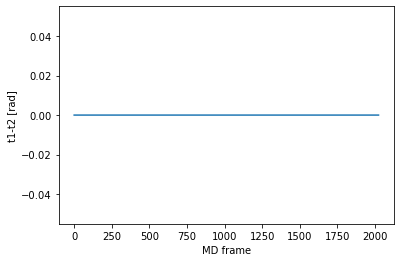

In [11]:
# import PLUMED COLVAR file into pandas dataset
data=plumed.read_as_pandas("Exercise-2/COLVAR")
print(data)
# plot the difference between the two dihedrals t1 and t2
plt.plot(data["time"], data["t1"]-data["t2"])
# x-y axis labels
plt.xlabel("MD frame")
plt.ylabel("t1-t2 [rad]")

In [12]:
%%bash
# Exercise 2B
# go into directory for Exercise 2
cd Exercise-2

# create PLUMED input file
cat > "plumed_B.dat" << EOF
# Activate MOLINFO functionalities
MOLINFO STRUCTURE=../data/5-HT1B.pdb

# MDAnalysis syntax:
r1: GYRATION ATOMS={@mda:{resid 1:40 and name CA}}
d1: DISTANCE ATOMS={@mda:{resid 1 40 and name CA}}

# MDTraj syntax
r2: GYRATION ATOMS={@mdt:{resid 0 to 39 and name CA}}
d2: DISTANCE ATOMS={@mdt:{resid 0 39 and name CA}}

# Print the collective variables on COLVAR file every step
PRINT ARG=r1,d1,r2,d2 FILE=COLVAR STRIDE=1
EOF

# run the driver
plumed driver --plumed plumed_B.dat --mf_xtc ../data/5-HT1B.xtc


DRIVER: Found molfile format trajectory xtc with name ../data/5-HT1B.xtc
PLUMED: PLUMED is starting
PLUMED: Version: 2.7.0 (git: Unknown) compiled on Dec 23 2020 at 20:47:11
PLUMED: Please cite these papers when using PLUMED [1][2]
PLUMED: For further information see the PLUMED web page at http://www.plumed.org
PLUMED: Root: /usr/local/anaconda3/envs/plumed-masterclass/lib/plumed
PLUMED: For installed feature, see /usr/local/anaconda3/envs/plumed-masterclass/lib/plumed/src/config/config.txt
PLUMED: Molecular dynamics engine: driver
PLUMED: Precision of reals: 8
PLUMED: Running over 1 node
PLUMED: Number of threads: 1
PLUMED: Cache line size: 512
PLUMED: Number of atoms: 6684
PLUMED: File suffix: 
PLUMED: FILE: plumed_B.dat
PLUMED: Action MOLINFO
PLUMED:   with label @0
PLUMED:   pdb file named ../data/5-HT1B.pdb contains 2 chains 
PLUMED:   chain named A contains residues 1 to 10 and atoms 1 to 6658 
PLUMED:   chain named B contains residues 391 to 391 and atoms 6659 to 6684 
PLUMED: 

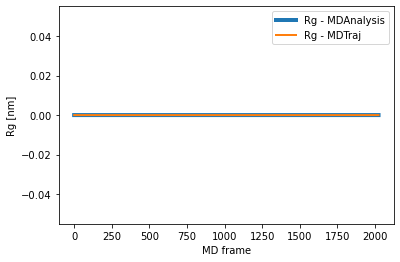

In [13]:
# import PLUMED COLVAR file into pandas dataset
data_1=plumed.read_as_pandas("Exercise-1/COLVAR")
data_2=plumed.read_as_pandas("Exercise-2/COLVAR")
# plot difference of gyration radius (Rg) from Exercise 1 and 2
plt.plot(data_2["time"],data_2["r1"]-data_1["r"],lw=4,label="Rg - MDAnalysis")
plt.plot(data_2["time"],data_2["r2"]-data_1["r"],lw=2,label="Rg - MDTraj")
# x-y axis labels
plt.xlabel("MD frame")
plt.ylabel("Rg [nm]")
plt.legend()

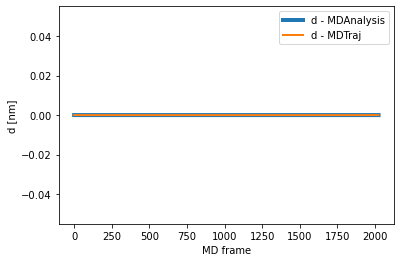

In [14]:
# plot difference of distance (d) from Exercise 1 and 2
plt.plot(data_2["time"],data_2["d1"]-data_1["d"],lw=4,label="d - MDAnalysis")
plt.plot(data_2["time"],data_2["d2"]-data_1["d"],lw=2,label="d - MDTraj")
# x-y axis labels
plt.xlabel("MD frame")
plt.ylabel("d [nm]")
plt.legend()

In [15]:
%%bash
# Exercise 3
# create directory for this exercise
mkdir Exercise-3; cd Exercise-3
# create PLUMED input file
cat > "plumed.dat" << EOF
# Geometric center of the ligand
lig: CENTER ATOMS=6659-6671
# Geometric center of the first glycan
g1: CENTER ATOMS=6212-6424
# Geometric center of the second glycan
g2: CENTER ATOMS=6425-6658

# Distance between ligand and first glycan
d1: DISTANCE ATOMS=lig,g1
# Distance between ligand and second glycan
d2: DISTANCE ATOMS=lig,g2

# Print the two distances on COLVAR file every step
PRINT ARG=d1,d2 FILE=COLVAR STRIDE=1 
EOF

# run the driver
plumed driver --plumed plumed.dat --mf_xtc ../data/5-HT1B.xtc


DRIVER: Found molfile format trajectory xtc with name ../data/5-HT1B.xtc
PLUMED: PLUMED is starting
PLUMED: Version: 2.7.0 (git: Unknown) compiled on Dec 23 2020 at 20:47:11
PLUMED: Please cite these papers when using PLUMED [1][2]
PLUMED: For further information see the PLUMED web page at http://www.plumed.org
PLUMED: Root: /usr/local/anaconda3/envs/plumed-masterclass/lib/plumed
PLUMED: For installed feature, see /usr/local/anaconda3/envs/plumed-masterclass/lib/plumed/src/config/config.txt
PLUMED: Molecular dynamics engine: driver
PLUMED: Precision of reals: 8
PLUMED: Running over 1 node
PLUMED: Number of threads: 1
PLUMED: Cache line size: 512
PLUMED: Number of atoms: 6684
PLUMED: File suffix: 
PLUMED: FILE: plumed.dat
PLUMED: Action CENTER
PLUMED:   with label lig
PLUMED:   serial associated to this virtual atom is 6685
PLUMED:   of atoms:
PLUMED:  6659 6660 6661 6662 6663 6664 6665 6666 6667 6668 6669 6670 6671
PLUMED:  using the geometric center
PLUMED:   broken molecules will be

Percentage of frames with lig closer to g1 than g2: 44.3


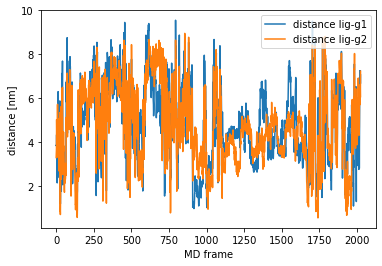

In [16]:
# import PLUMED COLVAR file into pandas dataset
data=plumed.read_as_pandas("Exercise-3/COLVAR")
# plot time serie of distances to glycans
plt.plot(data["time"],data["d1"],label="distance lig-g1")
plt.plot(data["time"],data["d2"],label="distance lig-g2")
# x-y axis labels
plt.xlabel("MD frame")
plt.ylabel("distance [nm]")
plt.legend()
# calculate when lig is closer to g1 than g2
count=0.
for i in range(0, len(data["time"])):
    if(data["d1"][i]<=data["d2"][i]): count+=1.0
print("Percentage of frames with lig closer to g1 than g2: %4.1lf" % (count/float(len(data["time"]))*100.0))

In [17]:
%%bash
# Exercise 4
# create directory for this exercise
mkdir Exercise-4; cd Exercise-4
# create PLUMED input file
cat > "plumed.dat" << EOF
# info about the system
MOLINFO STRUCTURE=../data/5-HT1B.pdb

# make first 40 N-terminal residues whole
WHOLEMOLECULES ENTITY0={@mda:{protein and resid 1:40}}

# alpha helix content of residues 1-40
h: ALPHARMSD RESIDUES=1-40 TYPE=OPTIMAL
# parallel beta sheet content of residues 1-40
pb: PARABETARMSD RESIDUES=1-40 TYPE=OPTIMAL
# antiparallel beta sheet content of residues 1-40
ab: ANTIBETARMSD RESIDUES=1-40 TYPE=OPTIMAL

# now we can create a new CV that sums parallel and antiparallel beta sheet contents
b: COMBINE ARG=pb,ab PERIODIC=NO

# Print the alpha helical content and the *total* beta sheet content on COLVAR file every step
PRINT ARG=h,b FILE=COLVAR STRIDE=1
EOF

# run the driver
plumed driver --plumed plumed.dat --mf_xtc ../data/5-HT1B.xtc


DRIVER: Found molfile format trajectory xtc with name ../data/5-HT1B.xtc
PLUMED: PLUMED is starting
PLUMED: Version: 2.7.0 (git: Unknown) compiled on Dec 23 2020 at 20:47:11
PLUMED: Please cite these papers when using PLUMED [1][2]
PLUMED: For further information see the PLUMED web page at http://www.plumed.org
PLUMED: Root: /usr/local/anaconda3/envs/plumed-masterclass/lib/plumed
PLUMED: For installed feature, see /usr/local/anaconda3/envs/plumed-masterclass/lib/plumed/src/config/config.txt
PLUMED: Molecular dynamics engine: driver
PLUMED: Precision of reals: 8
PLUMED: Running over 1 node
PLUMED: Number of threads: 1
PLUMED: Cache line size: 512
PLUMED: Number of atoms: 6684
PLUMED: File suffix: 
PLUMED: FILE: plumed.dat
PLUMED: Action MOLINFO
PLUMED:   with label @0
PLUMED:   pdb file named ../data/5-HT1B.pdb contains 2 chains 
PLUMED:   chain named A contains residues 1 to 10 and atoms 1 to 6658 
PLUMED:   chain named B contains residues 391 to 391 and atoms 6659 to 6684 
PLUMED: Ac

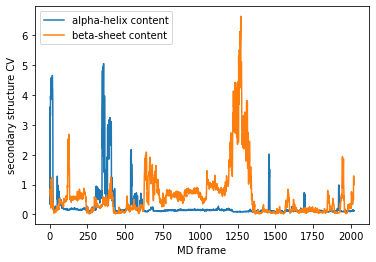

In [18]:
# import PLUMED COLVAR file into pandas dataset
data=plumed.read_as_pandas("Exercise-4/COLVAR")
# plot time serie of secondary structure CVs
plt.plot(data["time"],data["h"],label="alpha-helix content")
plt.plot(data["time"],data["b"],label="beta-sheet content")
# x-y axis labels
plt.xlabel("MD frame")
plt.ylabel("secondary structure CV")
plt.legend()

Text(0, 0.5, 'beta-sheet content')

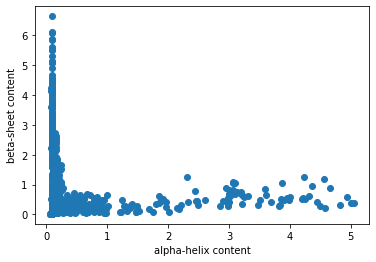

In [19]:
# plot one against the other
plt.plot(data["h"],data["b"], 'o')
# x-y axis labels
plt.xlabel("alpha-helix content")
plt.ylabel("beta-sheet content")

In [20]:
# More alpha helix or beta sheet?
h=0.; b=0.
for i in range(0, len(data["time"])):
    if(data["h"][i]>=1): h+=1.0
    if(data["b"][i]>=1): b+=1.0
print("Percentage of alpha helix: %4.1lf" % (h/float(len(data["time"]))*100.0))
print("Percentage of beta sheet:  %4.1lf"  % (b/float(len(data["time"]))*100.0))

Percentage of alpha helix:  4.4
Percentage of beta sheet:  14.4


In [21]:
# Exercise 5
# first, we need to create two reference PDBs to use with the RMSD CVs
# rmsd1: Backbone RMSD of first 40 residues with alignment on backbone of residues 41-390
# rmsd2: Backbone RMSD of residues 41-390 with alignment on same atoms
# create MDAnalysis universe from PDB file
u=MDAnalysis.Universe("data/5-HT1B.pdb")
# set occupancy and tempfactor to 0.0
for at in u.atoms:
    at.occupancy=0.0
    at.tempfactor=0.0
# selections
back_1_40   = u.select_atoms("protein and backbone and resid 1:40")
back_41_390 = u.select_atoms("protein and backbone and resid 41:390")
# mark atoms for alignment
for at in back_41_390:
    at.occupancy=1.0
# prepare ref-1.pdb: displacement on back_1_40
for at in back_1_40:
    at.tempfactor=1.0
# write new pdb
u.atoms.write("data/ref-1.pdb")
# prepare ref-2.pdb: displacement on back_41_390
for at in back_1_40:
    at.tempfactor=0.0
for at in back_41_390:
    at.tempfactor=1.0
# write new pdb
u.atoms.write("data/ref-2.pdb")

/usr/local/anaconda3/envs/plumed-masterclass/lib/python3.9/site-packages/MDAnalysis/coordinates/PDB.py:722: UserWarning: Unit cell dimensions not found. CRYST1 record set to unitary values.
  warnings.warn("Unit cell dimensions not found. "


In [22]:
%%bash
# Exercise 5
# create directory for this exercise
mkdir Exercise-5; cd Exercise-5
# create PLUMED input file
cat > "plumed.dat" << EOF
# Backbone RMSD of first 40 residues with alignment on backbone of residues 41-390
rmsd1: RMSD REFERENCE=../data/ref-1.pdb TYPE=OPTIMAL
# Backbone RMSD of residues 41-390 with alignment on same atoms
rmsd2: RMSD REFERENCE=../data/ref-2.pdb TYPE=OPTIMAL

# Print the two RMSD CVs on COLVAR file every step
PRINT ARG=rmsd1,rmsd2 FILE=COLVAR STRIDE=1
EOF

# run the driver
plumed driver --plumed plumed.dat --mf_xtc ../data/5-HT1B.xtc


DRIVER: Found molfile format trajectory xtc with name ../data/5-HT1B.xtc
PLUMED: PLUMED is starting
PLUMED: Version: 2.7.0 (git: Unknown) compiled on Dec 23 2020 at 20:47:11
PLUMED: Please cite these papers when using PLUMED [1][2]
PLUMED: For further information see the PLUMED web page at http://www.plumed.org
PLUMED: Root: /usr/local/anaconda3/envs/plumed-masterclass/lib/plumed
PLUMED: For installed feature, see /usr/local/anaconda3/envs/plumed-masterclass/lib/plumed/src/config/config.txt
PLUMED: Molecular dynamics engine: driver
PLUMED: Precision of reals: 8
PLUMED: Running over 1 node
PLUMED: Number of threads: 1
PLUMED: Cache line size: 512
PLUMED: Number of atoms: 6684
PLUMED: File suffix: 
PLUMED: FILE: plumed.dat
PLUMED: Action RMSD
PLUMED:   with label rmsd1
PLUMED:   reference from file ../data/ref-1.pdb
PLUMED:   which contains 6684 atoms
PLUMED:   with indices : 
PLUMED: 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 
PLUMED: 26 27 28 29 30 31 32 33 34 3

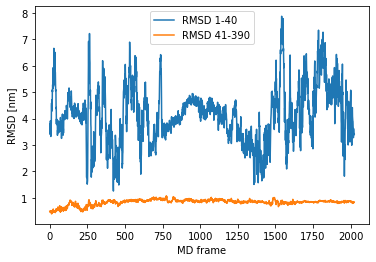

In [23]:
# import PLUMED COLVAR file into pandas dataset
data=plumed.read_as_pandas("Exercise-5/COLVAR")
# plot time serie of RMSDs
plt.plot(data["time"],data["rmsd1"],label="RMSD 1-40")
plt.plot(data["time"],data["rmsd2"],label="RMSD 41-390")
# x-y axis labels
plt.xlabel("MD frame")
plt.ylabel("RMSD [nm]")
plt.legend()

In [24]:
%%bash
# Exercise 6
# create directory for this exercise
mkdir Exercise-6; cd Exercise-6
# create PLUMED input file
cat > "plumed.dat" << EOF
# Activate MOLINFO functionalities
MOLINFO STRUCTURE=../data/5-HT1B.pdb
# make the protein whole - glycans excluded
WHOLEMOLECULES ENTITY0={@mda:{protein}}

# define ligand group
lig: GROUP ATOMS={@mda:{resname LIG}}
# wrap ligand atoms around residues 1-40
WRAPAROUND ATOMS=lig AROUND={@mda:{protein and resid 1:40}} GROUPBY=26
# wrap glycan atoms around residues N24 and N32
WRAPAROUND ATOMS=6212-6424 AROUND={@mda:{protein and resid 24}} GROUPBY=213
WRAPAROUND ATOMS=6425-6658 AROUND={@mda:{protein and resid 32}} GROUPBY=234
# fit to template
FIT_TO_TEMPLATE REFERENCE=../data/ref-2.pdb

# geometric center of the ligand
c-lig: CENTER ATOMS=lig
# define position of the ligand
p: POSITION ATOM=c-lig NOPBC

# dump conformations (all atoms: protein+glycans+ligand) to file to check
DUMPATOMS ATOMS=1-6684 FILE=5-HT1B_aligned.gro

# print component "z" of position CV (p.z) to COLVAR file every step
PRINT FILE=COLVAR STRIDE=1 ARG=p.z
EOF

# run the driver
plumed driver --plumed plumed.dat --mf_xtc ../data/5-HT1B.xtc


DRIVER: Found molfile format trajectory xtc with name ../data/5-HT1B.xtc
PLUMED: PLUMED is starting
PLUMED: Version: 2.7.0 (git: Unknown) compiled on Dec 23 2020 at 20:47:11
PLUMED: Please cite these papers when using PLUMED [1][2]
PLUMED: For further information see the PLUMED web page at http://www.plumed.org
PLUMED: Root: /usr/local/anaconda3/envs/plumed-masterclass/lib/plumed
PLUMED: For installed feature, see /usr/local/anaconda3/envs/plumed-masterclass/lib/plumed/src/config/config.txt
PLUMED: Molecular dynamics engine: driver
PLUMED: Precision of reals: 8
PLUMED: Running over 1 node
PLUMED: Number of threads: 1
PLUMED: Cache line size: 512
PLUMED: Number of atoms: 6684
PLUMED: File suffix: 
PLUMED: FILE: plumed.dat
PLUMED: Action MOLINFO
PLUMED:   with label @0
PLUMED:   pdb file named ../data/5-HT1B.pdb contains 2 chains 
PLUMED:   chain named A contains residues 1 to 10 and atoms 1 to 6658 
PLUMED:   chain named B contains residues 391 to 391 and atoms 6659 to 6684 
PLUMED: Ac

Text(0, 0.5, 'z-position [nm]')

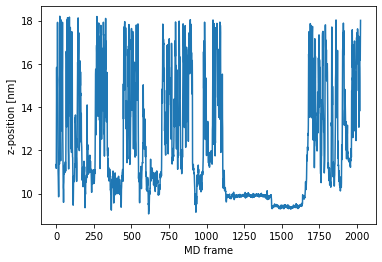

In [25]:
# import PLUMED COLVAR file into pandas dataset
data=plumed.read_as_pandas("Exercise-6/COLVAR")
# plot time serie of z-position
plt.plot(data["time"],data["p.z"])
# x-y axis labels
plt.xlabel("MD frame")
plt.ylabel("z-position [nm]")

In [26]:
# Exercise 7
# create directory for this exercise
!mkdir Exercise-7
# here we create the PLUMED input file with python
with open("Exercise-7/plumed.dat","w") as f:
# print initial stuff
 print("""
# Activate MOLINFO functionalities
MOLINFO STRUCTURE=../data/5-HT1B.pdb
# make the protein whole - glycans excluded
WHOLEMOLECULES ENTITY0={@mda:{protein}}

# define useful groups
# ligand atoms
lig: GROUP ATOMS={@mda:{resname LIG}}
# first 40 N-terminal residues
Nterm: GROUP ATOMS={@mda:{protein and resid 1:40}}
# glycan attached to N24
gly-N24: GROUP ATOMS=6212-6424
# glycan attached to N32
gly-N32: GROUP ATOMS=6425-6658

# wrap ligand atoms around residues 1-40
WRAPAROUND ATOMS=lig AROUND=Nterm GROUPBY=26
# wrap glycan atoms around N24 and N32
WRAPAROUND ATOMS=gly-N24 AROUND={@mda:{protein and resid 24}} GROUPBY=213
WRAPAROUND ATOMS=gly-N32 AROUND={@mda:{protein and resid 32}} GROUPBY=234
# fit to template
FIT_TO_TEMPLATE REFERENCE=../data/ref-2.pdb

# CVs definition
# minimum distance between ligand and protein/glycans
r0: DISTANCES GROUPA=lig GROUPB=Nterm,gly-N24,gly-N32 NOPBC MIN={BETA=50}
# minimum distance to individual residues (range 1-40)
""",file=f)
 for i in range(1, 41):
     print("r%d: DISTANCES GROUPA=lig GROUPB={@mda:{protein and resid %d}} NOPBC MIN={BETA=50}" % (i,i), file=f)
 print("""
# minimum distance to glycans
g1: DISTANCES GROUPA=lig GROUPB=gly-N24 NOPBC MIN={BETA=50}
g2: DISTANCES GROUPA=lig GROUPB=gly-N32 NOPBC MIN={BETA=50}
""",file=f)
 
# print out bound conformations (overall, per residue, and per glycan)
 for i in range(0, 41):
     print("""
UPDATE_IF ARG=r%d.min LESS_THAN=0.4
DUMPATOMS ATOMS=1-6684 FILE=bound_r%d.gro
UPDATE_IF ARG=r%d.min END
     """ % (i,i,i),file=f)
 for i in range(1, 3):
     print("""
UPDATE_IF ARG=g%d.min LESS_THAN=0.4
DUMPATOMS ATOMS=1-6684 FILE=bound_g%d.gro
UPDATE_IF ARG=g%d.min END
     """ % (i,i,i),file=f)

# print COLVAR files
 for i in range(0, 41):
     print("PRINT FILE=COLVAR_r%d ARG=r%d.min STRIDE=1" % (i,i), file=f)
 print("PRINT FILE=COLVAR_g1 ARG=g1.min STRIDE=1", file=f)
 print("PRINT FILE=COLVAR_g2 ARG=g2.min STRIDE=1", file=f)

In [27]:
%%bash
# Exercise 7
# go into directory for this exercise
cd Exercise-7

# run the driver
plumed driver --plumed plumed.dat --mf_xtc ../data/5-HT1B.xtc


DRIVER: Found molfile format trajectory xtc with name ../data/5-HT1B.xtc
PLUMED: PLUMED is starting
PLUMED: Version: 2.7.0 (git: Unknown) compiled on Dec 23 2020 at 20:47:11
PLUMED: Please cite these papers when using PLUMED [1][2]
PLUMED: For further information see the PLUMED web page at http://www.plumed.org
PLUMED: Root: /usr/local/anaconda3/envs/plumed-masterclass/lib/plumed
PLUMED: For installed feature, see /usr/local/anaconda3/envs/plumed-masterclass/lib/plumed/src/config/config.txt
PLUMED: Molecular dynamics engine: driver
PLUMED: Precision of reals: 8
PLUMED: Running over 1 node
PLUMED: Number of threads: 1
PLUMED: Cache line size: 512
PLUMED: Number of atoms: 6684
PLUMED: File suffix: 
PLUMED: FILE: plumed.dat
PLUMED: Action MOLINFO
PLUMED:   with label @0
PLUMED:   pdb file named ../data/5-HT1B.pdb contains 2 chains 
PLUMED:   chain named A contains residues 1 to 10 and atoms 1 to 6658 
PLUMED:   chain named B contains residues 391 to 391 and atoms 6659 to 6684 
PLUMED: Ac

Text(0, 0.5, '% frames')

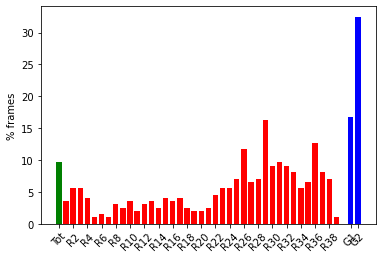

In [28]:
# now we analyze the results
# prepare list for bar plot
bar=[]
# 1) bound conformations: total and per residue
for i in range(0,41):
    # import PLUMED COLVAR_r$i file into pandas dataset
    data=plumed.read_as_pandas("Exercise-7/COLVAR_r"+str(i))
    count=0.
    for d in data["r"+str(i)+".min"]:
        # count bound conformations
        if(d<0.4): count+=1.0
    bar.append(count)
# 2) bound conformations per glycan
for i in range(1,3):
    # import PLUMED COLVAR_g$i file into pandas dataset
    data=plumed.read_as_pandas("Exercise-7/COLVAR_g"+str(i))
    count=0.
    for d in data["g"+str(i)+".min"]:
        # count bound conformations
        if(d<0.4): count+=1.0
    bar.append(count)
# normalization by total number of bound conformations
for i in range(1,43):
    bar[i] = bar[i] / bar[0] * 100.0
# normalization by total number of frames in MD trajectory
bar[0] = bar[0] / float(len(data["time"])) * 100.0
# create a bar plot
ind=range(0,43)
# total fraction of bound conformations
plt.bar(ind[0],    bar[0],    0.75, color="g")
# fraction of bound conformations per residue
plt.bar(ind[1:-2], bar[1:-2], 0.75, color="r")
# fraction of bound conformations per glycan
plt.bar(ind[-2:],  bar[-2:],  0.75, color="b")
# set ticks and labels
lab = ["Tot"]; ticks=[0]
for i in range(2,40,2):
    lab.append("R"+str(i))
    ticks.append(i)
lab += ["G1","G2"]; ticks += [41,42]
plt.xticks(ticks, lab, rotation=45)
plt.ylabel("% frames")